# Try out multiple clustering algorithms
We do not know if and how many outliers or abnormal observations there are. Therefore, we should mostly try out unsupervised methods that do not need a parameter that specifies the fraction of outliers.

## Query data from the DB

In [24]:
import pandas as pd

In [11]:
import sqlite3

def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by the db_file
    :param db_file: database file
    :return: Connection object or None
    """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
    except Error as e:
        print(e)

    return conn

conn = create_connection(r'C:\Users\rouma\Documents\BlueRock\TraceDB.db')
cur = conn.cursor()


In [64]:
# df = pd.read_sql_query('''
# SELECT gpsAt, lat, lon, speed, DeviceName, DistanceFromArrival, t.TraceID, Duration, PlannedDuration, AddrStart, AddrEnd, TraceNo, TimeDifference, Anomaly
# FROM Trace_A17501 t
#     INNER JOIN A17501_Info i ON t.TraceID=i.TraceID
# WHERE DeviceName == 'A10160' and t.TraceID = '5255375_1'
#  ''', conn)
# df

df = pd.read_sql_query(''' Select * from Trace_A17501 Where TraceID == '5264001_1' ''', conn)
df

# df= pd.read_sql_query('''SELECT distinct traceID from Trace_A17501 where DeviceName = 'A21419' ''', conn)
# df

# df = pd.read_sql_query(''' SELECT distinct TraceID, TraceNo FROM A17501_Info WHERE PlannedDuration > 120 ''', conn)
# df

,alt,batPct,gpsAt,heading,lat,lon,speed,DeviceName,TraceID,DistanceFromArrival
0,-3,100,2021-12-16 02:51:31,36,45.4832,-73.7220,25,A10159,5264001_1,1.286063
1,-14,100,2021-12-16 02:51:58,38,45.4852,-73.7195,45,A10159,5264001_1,0.998260
2,4,100,2021-12-16 02:52:28,42,45.4874,-73.7168,42,A10159,5264001_1,0.690729
3,7,100,2021-12-16 02:52:34,50,45.4879,-73.7161,37,A10159,5264001_1,0.621056
4,13,100,2021-12-16 02:52:49,58,45.4885,-73.7140,38,A10159,5264001_1,0.529400
5,10,100,2021-12-16 02:52:52,48,45.4887,-73.7137,38,A10159,5264001_1,0.507202
6,10,100,2021-12-16 02:52:58,346,45.4892,-73.7137,36,A10159,5264001_1,0.451624
7,4,100,2021-12-16 02:53:01,334,45.4894,-73.7139,36,A10159,5264001_1,0.429224
8,7,100,2021-12-16 02:53:22,272,45.4893,-73.7170,49,A10159,5264001_1,0.503786
9,12,100,2021-12-16 02:53:43,294,45.4896,-73.7200,13,A10159,5264001_1,0.628247


In [57]:
df[df['DistanceFromArrival'] < 1]

,gpsAt,lat,lon,speed,DeviceName,DistanceFromArrival,TraceID,Duration,PlannedDuration,AddrStart,AddrEnd,TraceNo,TimeDifference,Anomaly
774,2021-12-02 20:53:21,45.4560,-73.7230,34,A10160,0.962355,5255375_1,886.733333,660.0,340310,341142,A10160,226.733333,Yes
775,2021-12-02 20:53:57,45.4589,-73.7236,21,A10160,0.636515,5255375_1,886.733333,660.0,340310,341142,A10160,226.733333,Yes
776,2021-12-02 20:54:35,45.4613,-73.7240,14,A10160,0.368093,5255375_1,886.733333,660.0,340310,341142,A10160,226.733333,Yes
777,2021-12-02 20:55:10,45.4633,-73.7212,5,A10160,0.315168,5255375_1,886.733333,660.0,340310,341142,A10160,226.733333,Yes
778,2021-12-02 20:56:58,45.4628,-73.7162,27,A10160,0.700162,5255375_1,886.733333,660.0,340310,341142,A10160,226.733333,Yes
779,2021-12-02 20:57:39,45.4659,-73.7213,41,A10160,0.312341,5255375_1,886.733333,660.0,340310,341142,A10160,226.733333,Yes
780,2021-12-02 20:58:21,45.4676,-73.7203,12,A10160,0.488380,5255375_1,886.733333,660.0,340310,341142,A10160,226.733333,Yes
781,2021-12-02 20:58:57,45.4660,-73.7183,32,A10160,0.533082,5255375_1,886.733333,660.0,340310,341142,A10160,226.733333,Yes
782,2021-12-02 20:59:34,45.4628,-73.7226,38,A10160,0.261294,5255375_1,886.733333,660.0,340310,341142,A10160,226.733333,Yes
783,2021-12-02 21:02:29,45.4630,-73.7235,7,A10160,0.201711,5255375_1,886.733333,660.0,340310,341142,A10160,226.733333,Yes


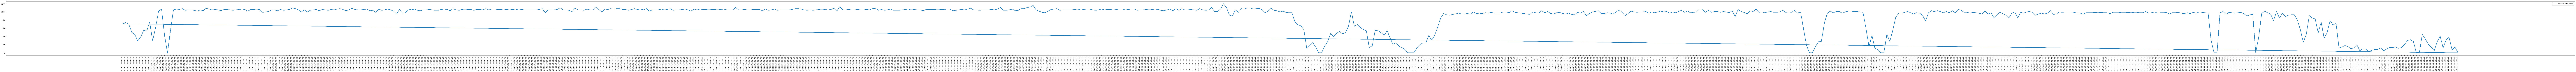

In [48]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates


from matplotlib.pyplot import figure


fig, ax = plt.subplots(1)
fig.autofmt_xdate()

plt.xticks(rotation=90)
plt.plot(df['gpsAt'], df['speed'], label = 'Recorded Speed')
#plt.scatter(dates, df['avgSpeed'], label = 'Calculated Speed')

xfmt = mdates.DateFormatter('%d-%m-%y %H:%M')
#ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=30))
#ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
ax.xaxis.set_major_formatter(xfmt)
plt.rcParams["figure.figsize"] = (250,6)

plt.legend(loc="upper right")
#plt.xlim(datetime(2021,11,24,4,10,0), datetime(2021,11,24,4,50,0) )
#plt.xlim(startDt, endDt)
plt.savefig('Plot.png')